# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
import joblib
from google.colab import files

# **Data Collecting**

In [2]:
file_id = "1JMjLzyfWbsua42CB36M38Ri8FMkTP-Fh"
url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(url)

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120994,60,perempuan,100.600000,normal
120995,60,perempuan,98.300000,stunted
120996,60,perempuan,121.300000,normal
120997,60,perempuan,112.200000,normal


# **Exploratory Data Analysis**

In [3]:
print("Informasi Dataset")
df.info()

Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [4]:
print("Ukuran Dataset")
df.shape

Ukuran Dataset


(120999, 4)

In [5]:
print("Statistik Deskriptif")
df.describe()

Statistik Deskriptif


,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


In [6]:
print("Missing values: ")
print(df.isnull().sum())

Missing values: 
Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64


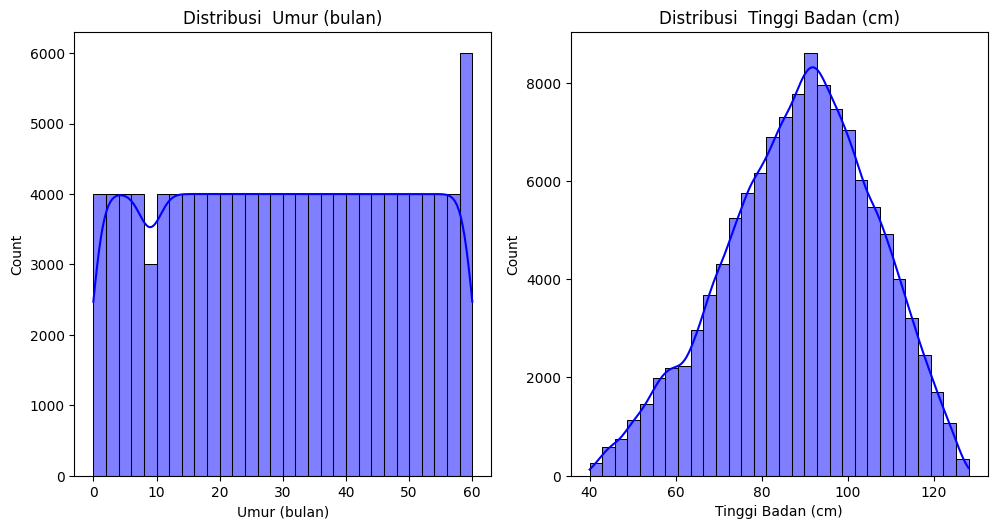

In [7]:
num_features = df.select_dtypes(include = [np.number])
plt.figure(figsize = (20, 15))
for i, column in enumerate(num_features.columns, 1):
  plt.subplot(3, 4, i)
  sns.histplot(df[column], bins = 30, kde = True, color = 'blue')
  plt.title(f"Distribusi  {column}")
plt.tight_layout()
plt.show()

<ipython-input-8-3ba437f0d8a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df[column], palette = 'viridis')
<ipython-input-8-3ba437f0d8a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df[column], palette = 'viridis')


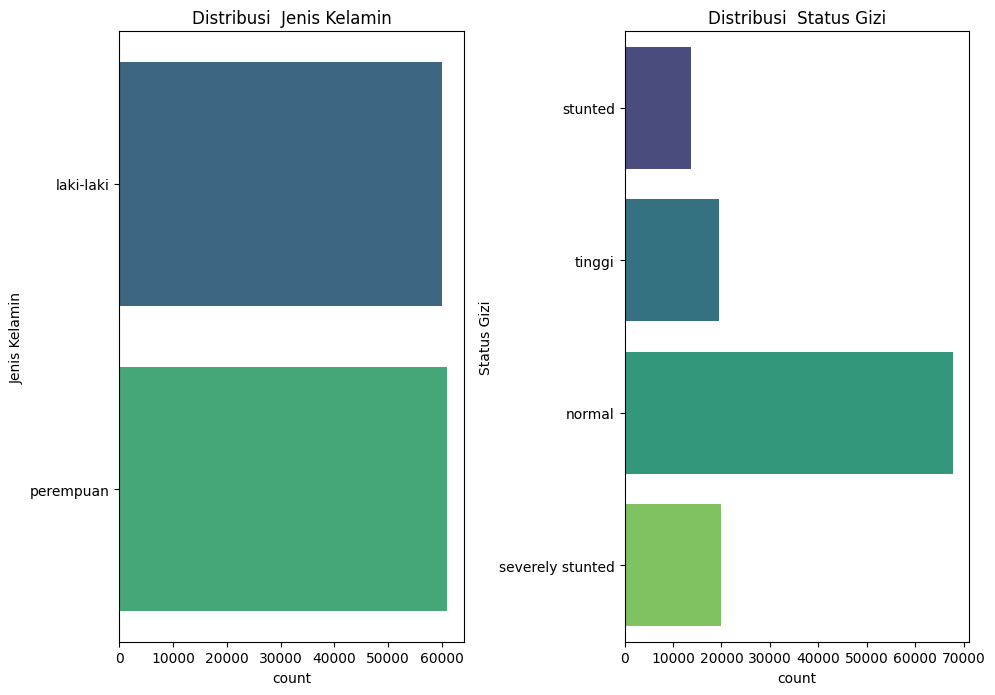

In [8]:
categorical_features = df.select_dtypes(include = [object])
plt.figure(figsize = (20, 20))
for i, column in enumerate(categorical_features.columns, 1):
  plt.subplot(3, 4, i)
  sns.countplot(y = df[column], palette = 'viridis')
  plt.title(f"Distribusi  {column}")
plt.tight_layout()
plt.show()

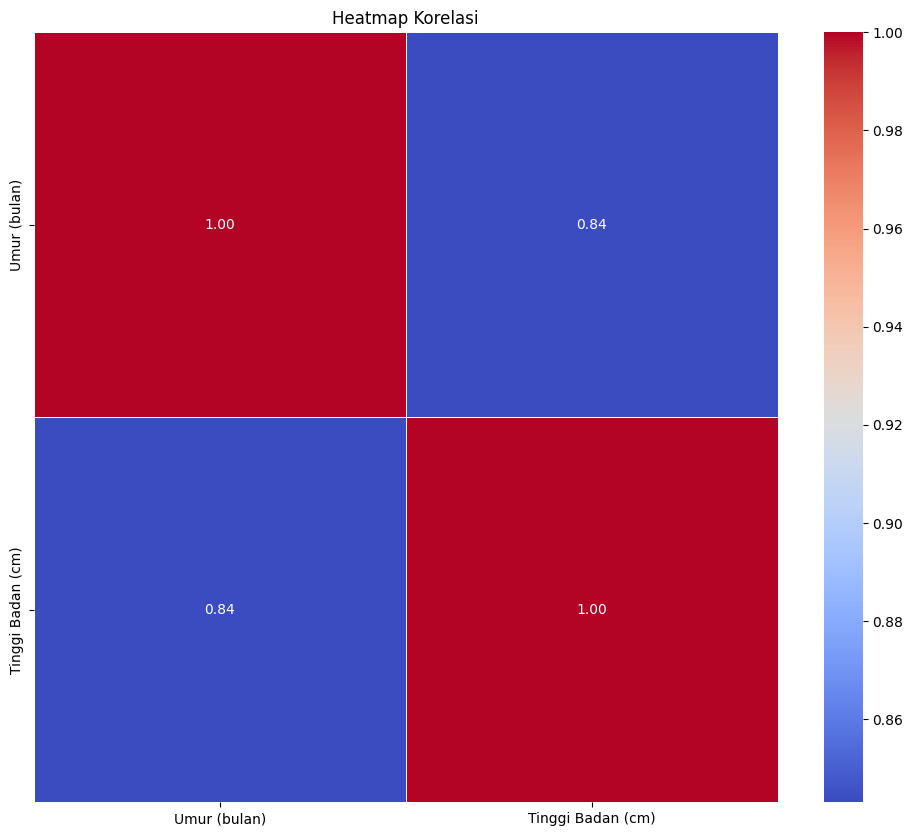

In [9]:
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

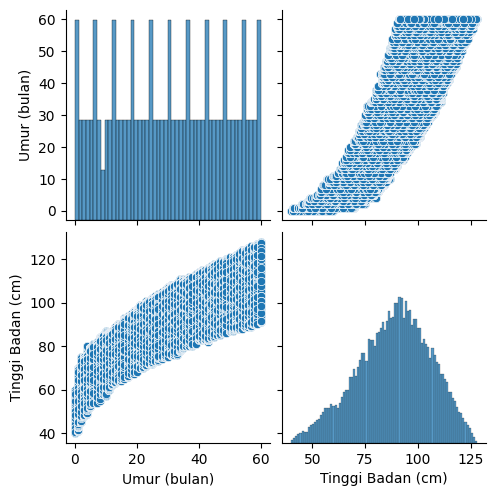

In [10]:
sns.pairplot(num_features)
plt.show()

<ipython-input-11-e04bb707758f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Status Gizi", data = df, palette = 'viridis')


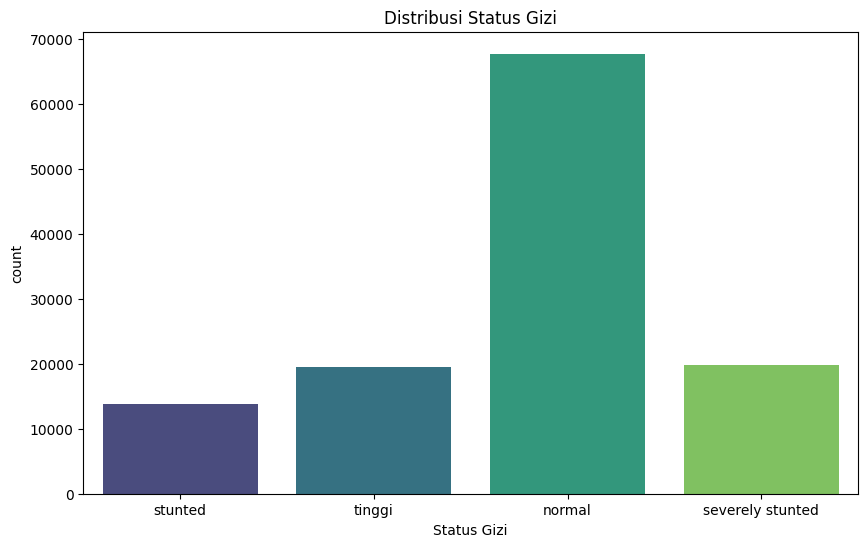

In [11]:
plt.figure(figsize = (10, 6))
sns.countplot(x = "Status Gizi", data = df, palette = 'viridis')
plt.title("Distribusi Status Gizi")
plt.show()

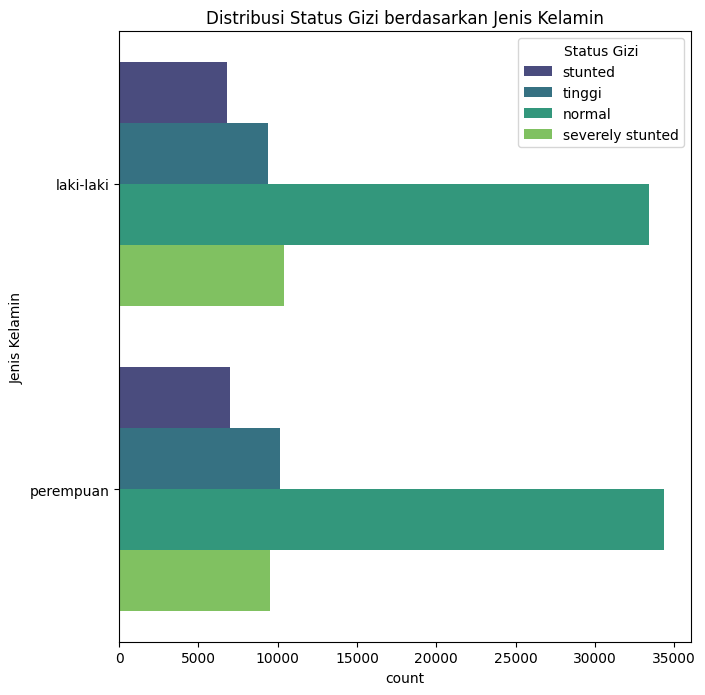

In [12]:
plt.figure(figsize = (25, 20))
for i, column in enumerate(categorical_features.columns, 1):
  if column != 'Status Gizi':
    plt.subplot(3, 4, i)
    sns.countplot(y = df[column], hue = df['Status Gizi'], palette = 'viridis')
    plt.title(f"Distribusi Status Gizi berdasarkan {column}")
plt.tight_layout()
plt.show()

# **Label Encoding**

In [13]:
label_encoder_gender = LabelEncoder()
df["Jenis Kelamin"] = label_encoder_gender.fit_transform(df["Jenis Kelamin"])
label_encoder_status = LabelEncoder()
df["Status Gizi"] = label_encoder_status.fit_transform(df["Status Gizi"])
df

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,44.591973,2
1,0,0,56.705203,3
2,0,0,46.863358,0
3,0,0,47.508026,0
4,0,0,42.743494,1
...,...,...,...,...
120994,60,1,100.600000,0
120995,60,1,98.300000,2
120996,60,1,121.300000,0
120997,60,1,112.200000,0


# **Data Splitting**

In [14]:
x = df.drop(columns = ['Status Gizi'])
y = df['Status Gizi']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f"Training set shape: X_train = {x_train.shape}, y_train = {y_train.shape}")
print(f"Test set shape: X_test = {x_test.shape}, y_test = {y_test.shape}")

Training set shape: X_train = (96799, 3), y_train = (96799,)
Test set shape: X_test = (24200, 3), y_test = (24200,)


# **Model Training**

In [15]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(x_train, y_train)
print("Model berhasil dilatih")

Model berhasil dilatih


In [16]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(rf, x_train, y_train, cv=5, scoring=scoring)

results_df = pd.DataFrame({
    'Fold': [f'Fold {i+1}' for i in range(5)],
    'Accuracy': scores['test_accuracy'],
    'Precision': scores['test_precision_macro'],
    'Recall': scores['test_recall_macro'],
    'F1 Score': scores['test_f1_macro'],
})

mean_row = results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].mean()
std_row = results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].std()

results_df.loc['Rata-rata'] = [''] + list(mean_row)
results_df.loc['Standar Deviasi'] = [''] + list(std_row)

results_df

,Fold,Accuracy,Precision,Recall,F1 Score
0,Fold 1,0.998812,0.998018,0.998589,0.998303
1,Fold 2,0.998554,0.998078,0.997570,0.997823
2,Fold 3,0.998657,0.998080,0.998169,0.998125
3,Fold 4,0.999070,0.998863,0.998489,0.998675
4,Fold 5,0.999174,0.998921,0.998941,0.998931
Rata-rata,,0.998853,0.998392,0.998352,0.998371
Standar Deviasi,,0.000264,0.000457,0.000516,0.000439


---- Random Forest Classifier (Training Set) ----
Confusion Matrix:
[[54373     0     0     0]
 [    0 15739     0     0]
 [    0     0 11025     0]
 [    0     0     0 15662]]
Accuracy (Training Set): 1.0000
Precision (macro avg) (Training Set): 1.0000
Recall (macro avg) (Training Set): 1.0000
F1-Score (macro avg) (Training Set): 1.0000


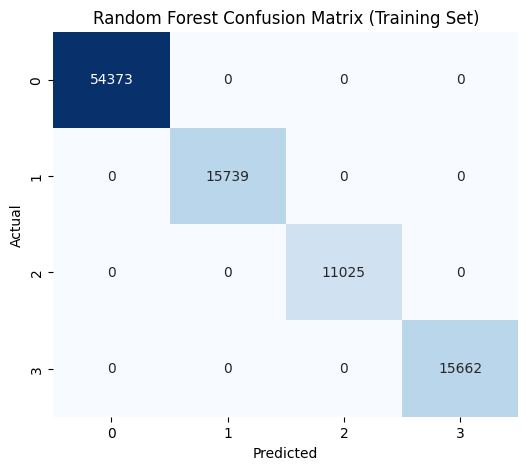

In [17]:
y_pred_rf_train = rf.predict(x_train)

cm_rf_train = confusion_matrix(y_train, y_pred_rf_train)

print("---- Random Forest Classifier (Training Set) ----")
print("Confusion Matrix:")
print(cm_rf_train)

accuracy_train = accuracy_score(y_train, y_pred_rf_train)
precision_train = precision_score(y_train, y_pred_rf_train, average='macro')
recall_train = recall_score(y_train, y_pred_rf_train, average='macro')
f1_train = f1_score(y_train, y_pred_rf_train, average='macro')

print(f"Accuracy (Training Set): {accuracy_train:.4f}")
print(f"Precision (macro avg) (Training Set): {precision_train:.4f}")
print(f"Recall (macro avg) (Training Set): {recall_train:.4f}")
print(f"F1-Score (macro avg) (Training Set): {f1_train:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf_train, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Random Forest Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Model Evaluation**

Random Forest
Confusion Matrix:
[[13376     0     6     0]
 [    0  4129     1     0]
 [    1     4  2785     0]
 [    9     0     0  3889]]
Accuracy: 0.9991
Precision (macro avg): 0.9989
Recall (macro avg): 0.9988
F1-Score (macro avg): 0.9989


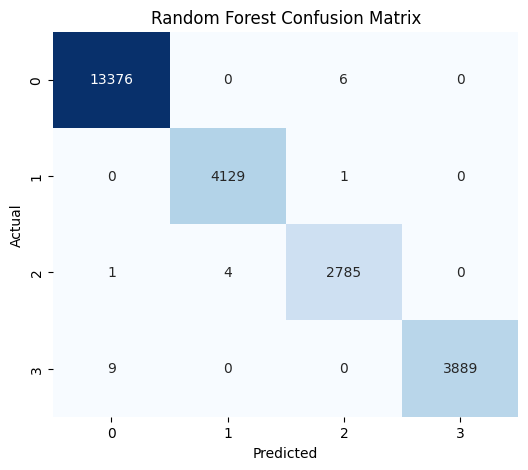

In [18]:
y_pred_rf = rf.predict(x_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest")
print("Confusion Matrix:")
print(cm_rf)

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')
f1 = f1_score(y_test, y_pred_rf, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"F1-Score (macro avg): {f1:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Model Saving**

In [19]:
joblib.dump(rf, 'stunting_classification_model.pkl')
joblib.dump(label_encoder_gender, 'label_encoder_gender.pkl')
joblib.dump(label_encoder_status, 'label_encoder_status.pkl')

files.download("stunting_classification_model.pkl")
files.download("label_encoder_gender.pkl")
files.download("label_encoder_status.pkl")